In [1]:
# CMSC478 Machine Learning - Fall 2021

# Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-2: Regression - Stock Market Prediction</font>

Dan Ebisawa cu30773

## Overview and Learning Objectives

In your second assignment, you are going to implement and train regression models. As mentioned in the lectures, regression models can predict a numeric value.

The ML task in this assignment is regression, predicting the `Close` price of Microsoft stock index [**MSFT**](https://www.google.com/finance/quote/MSFT:NASDAQ).

<b>Course Policy Reminder</b>
Debugging the codes and error resolution are ALWAYS the students' responsbility regardless of the source or the cause of the error. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

<b>Very Important Note:</b>
**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!** If you don't run some cells in a part, the whole part gets zero even if you write some codes in them.

Pedagogically, this assignment will help you:
- better understand regression. 
- practice regression performance metrics.
- practice with matplotlib and learn how to generate different plots.
- gain experience with financial technical analysis and stock market prediction.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct. Other outputs are NOT provided intentionally.

## Import Cell

The first thing to do is importing all necessary python and sklearn modules. **You definitely need to add to the following imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this cell.

In [86]:
# Import all necessary modules
import seaborn as seaborn
import sys
import sklearn 
import xgboost
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import datetime
from sklearn import linear_model
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

## Installing pandas-datareader

You should install [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/). In Linux, it's as easy as running the following pip command in your notebook. In other OS platforms, you may need to install it via Anaconda command prompt. **You are responsible for proper installation and resolving any issues that may arise during the installation process**.

In [3]:
#!pip install pandas-datareader

In [4]:
import pandas_datareader.data as web

## Part I - Preprocessing

Now you can read the data live from the [web](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#stooq-index-data).

In [5]:
df = web.DataReader('MSFT', 'stooq', start='2012-01-01', end='2021-10-05')
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-05,284.0464,290.398,284.0464,288.76,24993024
2021-10-04,287.4000,287.750,280.2500,283.11,31350747
2021-10-01,282.1217,289.980,281.2900,289.10,30086280
2021-09-30,285.7100,287.830,281.6200,281.92,32343635
2021-09-29,285.1000,286.770,283.0100,284.00,26353696
2021-09-28,289.7950,290.780,282.7500,283.52,43186237
2021-09-27,296.1400,296.470,292.9449,294.17,23571742
2021-09-24,298.2300,299.800,296.9300,299.35,14998978
2021-09-23,298.8450,300.900,297.5339,299.56,18604601


> To make all submissions consistent, do NOT change the dates, source and stock index.

> The data is already very clean; however, you should always try to get some insights initially.

In [6]:
df.reset_index(inplace=True)
df.describe()

,Open,High,Low,Close,Volume
count,2456.000000,2456.000000,2456.000000,2456.000000,2.456000e+03
mean,88.323902,89.141641,87.485633,88.365283,3.733027e+07
std,71.657952,72.349475,70.964094,71.702483,2.133297e+07
min,21.472000,21.860000,21.402000,21.699000,7.797724e+06
25%,35.847750,36.222500,35.613000,35.932000,2.365191e+07
50%,56.005500,56.350000,55.623000,56.022000,3.193310e+07
75%,121.025000,122.415000,120.430000,121.727500,4.480348e+07
max,305.020000,305.840000,302.003500,305.220000,2.933959e+08


> One of the techniques to get more insights about the data before training the regression model is correlation analysis. Correlation analysis tells you which columns are correlated. Pandas dataframe has [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to caclulate the correlations.

In [7]:
corr = df.corr(method='pearson')
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999899,0.999891,0.999795,-0.297753
High,0.999899,1.000000,0.999831,0.999883,-0.294524
Low,0.999891,0.999831,1.000000,0.999895,-0.301417
Close,0.999795,0.999883,0.999895,1.000000,-0.298456
Volume,-0.297753,-0.294524,-0.301417,-0.298456,1.000000


> You can also visualize the correlations using [seaborn](https://seaborn.pydata.org/installing.html) heatmaps. You should install it if you don't have it, and then you should import it.

<AxesSubplot:>

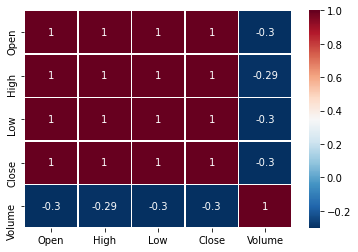

In [8]:
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

> Next, drop `Volume` and `Adj Close`.

In [9]:
#Drop Volume and Adj Close
df = df.drop(columns=['Volume'])
df.reset_index(inplace=True,drop=False)

df.head(10)


,index,Date,Open,High,Low,Close
0,0,2021-10-05,284.0464,290.398,284.0464,288.76
1,1,2021-10-04,287.4000,287.750,280.2500,283.11
2,2,2021-10-01,282.1217,289.980,281.2900,289.10
3,3,2021-09-30,285.7100,287.830,281.6200,281.92
4,4,2021-09-29,285.1000,286.770,283.0100,284.00
5,5,2021-09-28,289.7950,290.780,282.7500,283.52
6,6,2021-09-27,296.1400,296.470,292.9449,294.17
7,7,2021-09-24,298.2300,299.800,296.9300,299.35
8,8,2021-09-23,298.8450,300.900,297.5339,299.56
9,9,2021-09-22,296.7250,300.220,294.5100,298.58


> Next, you should create the exact same plot as given below. EVERYTHING should look exactly the same as this plot. The specifications are as follows:
> - `figsize` should be (16,8)
> - `fontsize` for title should be 18 and for the axis labels should be 16.
> - You should use a [`seaborn`](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) style with the grid displayed in the background and everything else should look the same. 
> - Your plot must have the same title and axis labels.
> - You can see [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to learn how to change specifications.

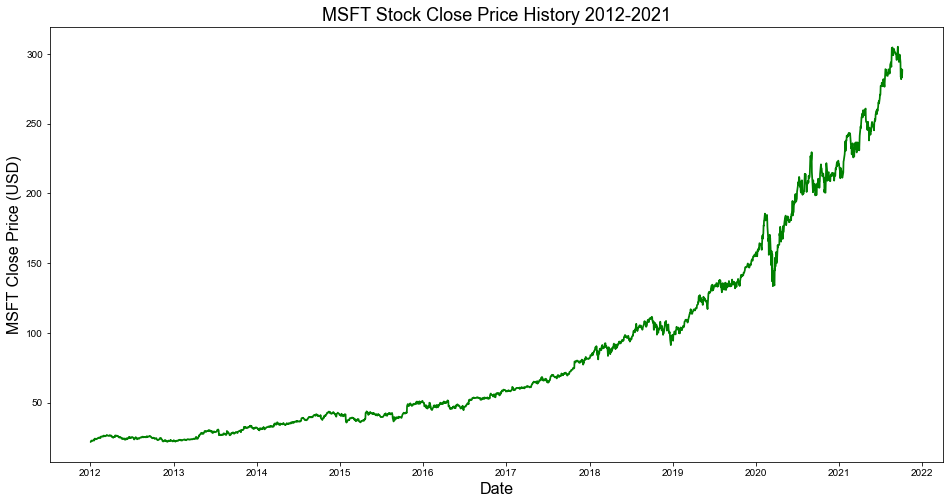

In [10]:
'''[10 points] Incomplete/incorrect plots get zero
Generate the following plot. It should be EXACTLY the same!
'''
plt.figure(figsize=(16,8))
plt.ylabel("MSFT Close Price (USD)",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.title("MSFT Stock Close Price History 2012-2021",fontsize=18)
plt.style.use('seaborn')

x=df['Date']
y=df['Close']

plt.plot(x,y,color='green')
plt.show()


> Next, you should decompose `Date` to `Year`, `Month`, and `Day`.

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

> Now create a new dataframe `msft` by choosing the following columns from `df` in the same order as below:

In [12]:
msft = df[['Day','Month','Year','High','Open','Low','Close']]
msft.tail(10)

,Day,Month,Year,High,Open,Low,Close
2446,17,1,2012,23.230,23.027,22.846,22.914
2447,13,1,2012,22.911,22.651,22.537,22.911
2448,12,1,2012,22.723,22.576,22.422,22.705
2449,11,1,2012,22.690,22.243,22.194,22.480
2450,10,1,2012,22.824,22.626,22.504,22.574
2451,9,1,2012,22.786,22.744,22.479,22.496
2452,6,1,2012,22.858,22.353,22.320,22.786
2453,5,1,2012,22.489,22.209,22.130,22.446
2454,4,1,2012,22.276,21.750,21.716,22.216
2455,3,1,2012,21.860,21.472,21.402,21.699


> Next separate the independent variables (features) from the dependent variable (target column) which is `Close`. So your `X` should contain all columns in `msft` except `Close` and `y` should include `Close` only.

In [13]:
# Separate features from the target
X = msft.drop(columns=["Close"])
y = msft["Close"]

In [14]:
print(X.shape)
print(y.shape)

(2456, 6)
(2456,)


> **Important Note**: Double-check and make sure that `X` and `y` do NOT have anything in common; otherwise your whole work will be wrong!

In [15]:
X

,Day,Month,Year,High,Open,Low
0,5,10,2021,290.398,284.0464,284.0464
1,4,10,2021,287.750,287.4000,280.2500
2,1,10,2021,289.980,282.1217,281.2900
3,30,9,2021,287.830,285.7100,281.6200
4,29,9,2021,286.770,285.1000,283.0100
...,...,...,...,...,...,...
2451,9,1,2012,22.786,22.7440,22.4790
2452,6,1,2012,22.858,22.3530,22.3200
2453,5,1,2012,22.489,22.2090,22.1300
2454,4,1,2012,22.276,21.7500,21.7160


In [16]:
y

0       288.760
1       283.110
2       289.100
3       281.920
4       284.000
         ...   
2451     22.496
2452     22.786
2453     22.446
2454     22.216
2455     21.699
Name: Close, Length: 2456, dtype: float64

> As mentioned in the lectures, the data for supervised learning (both classification and regression) is split into training set and test set. We usually do this by importing [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) module from scikit-learn.
Split the data by a `test_size` ratio of 0.25

In [17]:
# Partition the data into train and test with a split ratio of 75/25 for train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1842, 6)
(614, 6)
(1842,)
(614,)


## Part-II Linear Regression with Closed Form Solution (Least Squares)

Now that the data is prepared, you can train and test regression models.

First, you are going to use the Least Squares method using the normal equation. You can check the slides and see examples of the closed form solution (Least Squares) there. You don't have to add a column containing ones. It is fine to add ones similar to the slides/textbook example but you don't have to, you can directly get `theta_best` from `X_train` and `y_train` using normal equation.

As discussed in the lectures, the normal equation is as follows:

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In this normal equation:

- $\hat{\boldsymbol{\theta}}$ is the value of $\theta$ that minimizes the cost function, i.e. `theta_best`.

- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$, i.e. `y_train`.

- $\mathbf{X}$ is the vector of features, i.e. `X_train`.

In [19]:
# Compute theta_best using normal equation in ONE LINE
# Hint: You should use an np method and pandas dataframe dot product
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [20]:
theta_best.shape

(6,)

In [21]:
# Make predictions on X_test using theta_best
y_pred_ls = X_test.dot(theta_best)

#### Regression Model Evaluation: MSE, RMSE, MAE

Next, you should evaluate the regression model.

Remember from the lectures that three of the regression performance measures are MSE, RMSE, and MAE:

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$


$
\text{RMSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \sqrt{\dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}}
$

$
\text{MAE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| \boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right|
$

where $\boldsymbol{\theta}^T \mathbf{x}^{(i)}$ is your prediction versus $y^{(i)}$ target values, and $m$ is number of instances.

You should implement `mse`, `rmse`, and `mae` functions using ONE LINE of code for each `return` and by using Numpy `np` methods only. You should NOT use sklearn methods for implementing them, otherwise your code gets zero points for this part.

In [22]:
def mse(y_true, y_pred):
    return (np.linalg.norm(y_true-y_pred)**2)/len(y_true)

In [23]:
def rmse(y_true, y_pred):
    return np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())

In [24]:
def mae(y_true, y_pred):
    return np.mean(np.abs(np.subtract(y_true,y_pred)))


> Now compute the `mse`, `rmse`, and `mae` for the Least Squares regression model. They all should be small numbers less than 1. 

In [25]:
mse_ls = mse(y_test, y_pred_ls)
rmse_ls = rmse(y_test, y_pred_ls)
mae_ls = mae(y_test, y_pred_ls) 
print('LS MSE', mse_ls)
print('LS RMSE', rmse_ls)
print('LS MAE', mae_ls)

LS MSE 0.37065961182853474
LS RMSE 0.6088182091795008
LS MAE 0.34499605729278715


In [26]:
print("{:.25f}".format(mae_ls))
print("{:.25f}".format(mse_ls))

0.3449960572927871504944619
0.3706596118285347407628194


> Next, you should check your implemented methods `mae` and `mse` by comparing your scores with the scores computed by [scikit-learn methods](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error). They should match precisely. **Note**: Do NOT round the scores. Their precision should NOT be reduced.

In [27]:
# Compute mae and mse of LS model by sklearn methods
sklearn_mae_ls = mean_absolute_error(y_test,y_pred_ls)
sklearn_mse_ls = mean_squared_error(y_test,y_pred_ls)

print("{:.25f}".format(sklearn_mae_ls))
print("{:.25f}".format(sklearn_mse_ls))

0.3449960572927871504944619
0.3706596118285347407628194


In [28]:
# Scores computed by your functions should be equal to the scores computed by sklearn methods
if sklearn_mae_ls == mae_ls:
    print('MAE is correct!')
else:
    print('MAE is wrong!')
    
if sklearn_mse_ls == mse_ls:
    print('MSE is correct!')
else:
    print('MSE is wrong!')  

MAE is correct!
MSE is correct!


> Next, you should show that your LS regression model works pretty well by generating the following plot `MSFT Close Price - Actual vs Prediction`. Your generated plot should look EXACTLY the same as the provided one. You should use the same specifications of the previous plot in Part-I for (size, font size, style). Check [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to learn how to change specifications.

> The plot shows that `Actual` target values (`y_test`) and `Prediction` values of the LS model (`y_pred_ls`) match very highly.

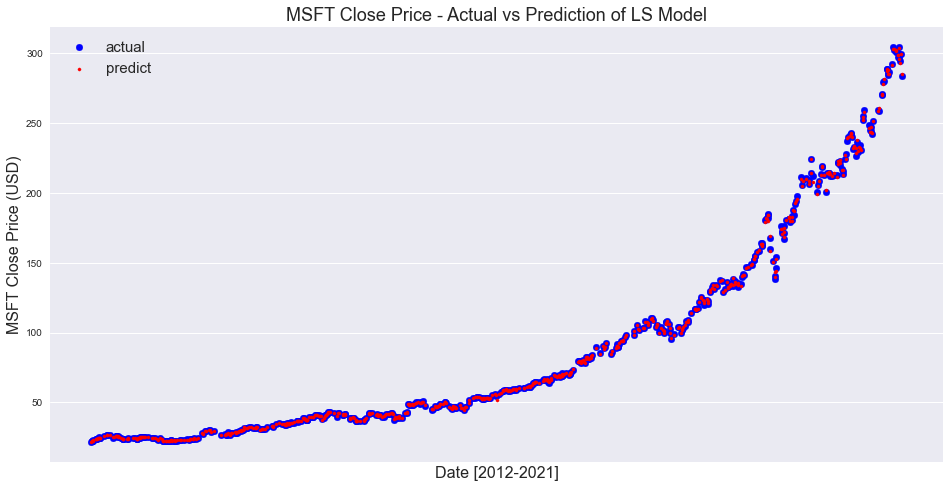

In [29]:
''' [10 points] Incomplete plots and plots that do not precisely match with the provided plot get zero.

Plot the Actual (y_test) vs Prediction (y_pred_ls) of LS model

The legend should display two different colors just like this plot, blue for `Actual` and red for `Prediction`.

The red points for Prediction should be slightly smaller than Actual just like the legend points,
so that they are both displayed properly as displayed below.

Everything else (the title, grid, axis labels and ticks) should match precisely with the provided plot.

Note that x-axis has the label `Date [2012-2021]` with no `xticks` and there is no vertical bars in the grid.

'''

plt.figure(figsize=(16,8))
plt.ylabel("MSFT Close Price (USD)",fontsize=16)
plt.xlabel("Date [2012-2021]",fontsize=16)
plt.title("MSFT Close Price - Actual vs Prediction of LS Model",fontsize=18)
plt.style.use('seaborn')
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,    
    top=False,
    labelbottom=False)         
plt.grid(axis='x')


dates = pd.to_datetime(X_test[["Year","Month","Day"]])
y_actual = y_test
y_predict = y_pred_ls

plt.scatter(dates,y_actual,color='blue',s=45,label='actual')
plt.scatter(dates,y_predict,color='red',s=10,label='predict')

plt.legend(loc="upper left",prop={'size':15})

plt.show()



### Part-II Questions

- **Q1** [5 points] Why `theta_best.shape` shape is (6,)? You should explain completely.

- Answer of Q1: 
Since there are 6 columns on X variables, there are 6 weights for the linear regression. 
The output of the theta_best.shape is a row of the weights of each input variables.  


- **Q2** [5 point] Do some research and find out when/why MAE may be favored against MSE and vice-versa. In other words, in what situations MAE is a better indication of model performance and in what situations MSE? Explain your findings completely.

- Answer of Q2:
    
    MSE is more favored than MAE because it is differentiable, while MAE is not. 
    also, since it is squared, bigger errors are more penalized then MAE in MSE.
    
    MAE is more robust to outliers compared to MSE because error are treated equally. 
    
    if outlier needs to be more penalised, MSE should be used.  if not, MAE works fine as well.  
    
    

## Part-III  Scikit-learn Linear Regression, SVR and XGBoost

In Part-III, you are going to use [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) and [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) to build regression models.

In [43]:
# Build a LinearRegression model and train it on (X_train, y_train)
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [44]:
# Test lin_reg on X_test
y_pred_lin_reg = lin_reg.predict(X_test)

In [45]:
# Compute rmse for lin_reg using your own rmse function
rmse_lin_reg = rmse(y_test, y_pred_lin_reg)
print('Linear Regression RMSE', rmse_lin_reg)

Linear Regression RMSE 0.6091125096425102


> Next, you should generate a plot Actual (`y_test`) on the y-axis vs Prediction (`y_pred_lin_reg`) on the x-axis that looks exactly like the following plot. Very minor variance in the blue points is acceptable but the line should be exactly the same.

> The plot is titled `Plot Q3` because question **Q3** asks about it. The plot has 5 points, and the correct answer to **Q3** has also 5 points.

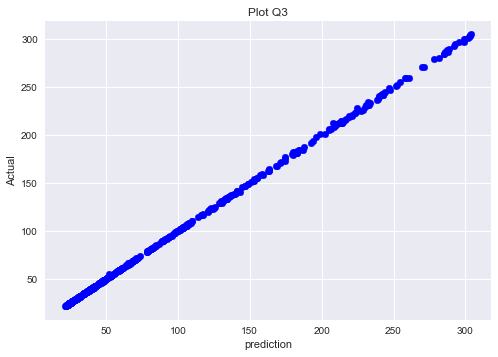

In [47]:
# Plot Q3 [5 points]


plt.ylabel("Actual")
plt.xlabel("prediction")
plt.title("Plot Q3")
plt.style.use('seaborn')
plt.tick_params(
    axis='x',        
    which='both',      
    bottom=False,    
    top=False,)         

y_axis_actual = y_test
x_axis_predict = y_pred_lin_reg

plt.scatter(x_axis_predict,y_actual,color='blue',s=45)

plt.show()

> Next build a SVM regression model (SVR). Remember that SVM can be used for both classification and regression.

In [52]:
# Build a SVR (SVM Regression) model and train it on (X_train, y_train), kernel should be 'linear'
svr = SVR(kernel="linear")
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [53]:
# Test svr
y_pred_svr = svr.predict(X_test)

In [54]:
# Compute rmse for svr
rmse_svr = rmse(y_test, y_pred_svr)
print('SVR RMSE', rmse_svr)

SVR RMSE 0.7110188041254257


> Next, you should create an [XGBoost Regression](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) model. You should build a `XGBRegressor()` model and pass this argument `objective ='reg:squarederror'` to it.

In [57]:
# Build a xgb regression model and train it on (X_train, y_train)
xgb_reg = xgboost.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# Test xgb_reg
y_pred_xgb = xgb_reg.predict(X_test)

In [59]:
# Compute rmse for xgb_reg
rmse_xgb = rmse(y_test,y_pred_xgb)
print('XGB RMSE', rmse_xgb)

XGB RMSE 1.0701509596603298


> SVR outperforms XGBoost on this problem. Next, you should fine-tune hyperparameters of SVR per the instructions in the following cell.

> If a model has a lot of hyperparameters, it is not an easy task to fine-tune them, and as you experienced, `GridSearchCV` takes a lot of time, so this time you're going to use a different search strategy [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) which is much faster and more efficient than `GridSearchCV` (which is more suitable when you have fewer number of combinations of hyperparameters). Read its documentation and notice that while it is very similar to `GridSearchCV`, the dictionary that stores the params/values is a different parameter in this method.

> Also, read [this article](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) on the comparison between the two search methods. 

In [84]:
'''[20 points] If you do not satisfy the rmse requirement in the following cell, the grade of this part will be zero
Fine-tune hyperparameters of SVR using RandomizedSearchCV to get rmse 0.73 or lower
You must tune 'tol', 'C', 'epsilon', 'shrinking' in the search
You should include at least two values per hyperparameter (and more if needed)
'''
svr = SVR()
param_distributions= [{'kernel':['linear'],
                      'C':[1,100,1000,2000,5000],
                      'tol':[.01,.05,.1,.2,.3],
                      'epsilon':[.08,.1,.12],
                      'shrinking':[True,False]}]

randomized_search = RandomizedSearchCV(svr,param_distributions,verbose=True)
best_svr = randomized_search.fit(X_train,y_train)

print('Randomized search for hyperparameter tuning of SVR Regressor')
print('Best Parameters: ' + str(best_svr.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized search for hyperparameter tuning of SVR Regressor
Best Parameters: {'tol': 0.01, 'shrinking': False, 'kernel': 'linear', 'epsilon': 0.08, 'C': 1}


In [85]:
# Train and test best_svr, and compute rmse with your rmse function that you implemented
best_svr = randomized_search.best_estimator_.fit(X_train,y_train)
y_pred_best_svr = best_svr.predict(X_test) 
rmse_best_svr = rmse(y_test,y_pred_best_svr)
print('Best SVR RMSE', rmse_best_svr)

Best SVR RMSE 0.6548511814464114


> **Maximum Acceptable RMSE Requirement for Best SVR**: Your rounded `rmse_best_svr` with two decimal places should be less than or equal to **0.73**, so if your rounded `rmse_best_svr` is higher than 0.73, it is NOT acceptable. It should be 0.73 or lower; **otherwise it gets zero points for this part**. The correct implementation of the randomized search and getting the desired rmse has 20 points.

> **Hint**: Because you are using `RandomizedSearchCV` which takes less time, you should try as many values for the hyperparameters as needed. You may have to run the randomized search multiple times until you get `rmse_best_svr` equal to 0.73 or lower. If after a few runs you couldn't get the desired result, you may have to repartition the data again (rerun the `train_test_split()` method and try again with a new search). You should do this experiment patiently as it may take a lot of time and efforts. One has to work tirelessly to gain the required skills and the desired results in ML and Data Science projects.

> Last step is calculating another regression performance measure $R^2$ [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). You can use sklearn [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) method. For SVR, the $R^2$ score must be for the `best_svr`. All $R^2$ scores of your regression models should be close to 1. 

In [106]:
r2_ls = r2_score(y_test,y_pred_ls)
r2_lin_reg = r2_score(y_test,y_pred_lin_reg)
r2_xgb = r2_score(y_test,y_pred_xgb)
r2_best_svr = r2_score(y_test,y_pred_best_svr)



print('Least Squares R2: ', r2_ls)
print('Linear Regression R2: ', r2_lin_reg)
print('XGB R2: ', r2_xgb)
print('Best SVR R2: ', r2_best_svr)

Least Squares R2:  0.9999310231066819
Linear Regression R2:  0.9999309564042155
XGB R2:  0.9997868828233516
Best SVR R2:  0.999920198033357


### Part-III Question

- **Q3** [5 points] What does `Plot Q3` the Actual vs Prediction plot of `lin_reg` model imply? Explain completely. You should justify your answer mathematically, otherwise your answer gets zero.
- Answer of Q3: 

the plot shows the relationship between the actual y_test score and the Y_predict derived from linearregression().

Since the relationship is linear, the model can fit a linear equation y=mx+b. 

bolow shows the line of best fit of the Q3 graph.
m is the slope.  since the number is close to 1, it shows that the number of actual and the predicted was very close to each other.  

b is the bias.  since the number is close to 0, we can conclude that the value between the actual and predicted was very similar.    

In [108]:
m,b = np.polyfit(y_pred_lin_reg,y_test,1)
print(m)
print(b)


1.0002762612485256
0.0008783431339034293


## Grading

Assignment-2 has a maximum of 100 points. **You must run all cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!** Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part-I - 15 points - **Incorrect/incomplete plot in Part-I gets zero.**
   

- Part-II - 45 points
    - Implementation and results: 35 points
        - Correct Least Squares model: 10 points
        - Correct mse, rmse, and mae functions: 15 points
        - Correct "MSFT Close Price - Actual vs Prediction" plot: 10 points - **Incorrect/incomplete plot gets zero.**
    - Part-II Questions: 10 points
    

- Part-III - 40 points
    - Implementation and results: 35 points
        - Building three regression models: 15 points
        - Randomized search and getting the desired rmse for `best_svr`: 20 points **Note**: Incorrect `RandomizedSearchCV` and not meeting the rmse requirement get zero.
    - Part-III Question: 5 points
    

<b>Note: </b>Follow the instructions of each section carefully. **Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.**

Grading will be based on: 

  * correct implementation,
  * running ALL cells and correct outputs and plots, (cells with no output get ZERO for the whole part that includes the cell)
  * correct answer to the questions,
  * readability of the notebook.

## Submission

Name your notebook ```Lastname-A2.ipynb```. Submit the completed notebook using the ```Assignment-2``` link on Blackboard.

**Note:** You have a maximum of TWO submissions. If you submit a second notebook, your second notebook will be graded and the first submitted notebook will be ignored. Be very careful in your submissions as resubmission requests (for the third time) will NOT be accepted!
  
<font color=red><b>Due Date: Thursday October 14th, 11:59PM</b></font>